<a href="https://colab.research.google.com/github/2301020/CSC3105-Project/blob/main/UoG-DA_Group28.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UoG-DA_Group28 Jupyter Notebook

<hr>

## <u> Data Pre-Processing </u>

### Step 0: Library Imports and Misc. Setup

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os

# Method to extract data from all 7 files to a Pandas DataFrame
def import_from_files_single_dataframe(rootdir):
    file_list =[]
    for dirpath, dirnames, filenames in os.walk(rootdir):
        for file in filenames:
            filename = os.path.join(dirpath, file)
            print(filename)
            file_list.append(filename)
            # read data from file

    df = pd.concat((pd.read_csv(f) for f in file_list), ignore_index=True)

    return df

### Step 1: Data Importing/Merging

In [2]:
# Import raw data from folder with dataset
print("Importing dataset to Pandas dataframe")
print("-------------------------------")
df = import_from_files_single_dataframe("./UWB_LOS_NLOS_Data_Set/dataset/")

# Displays the Head (First 5 rows of dataset) and Tail (Last 5 rows of dataset)
print("\nDataset:")
print("-------------------------------")
print(df)

Importing dataset to Pandas dataframe
-------------------------------
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part1.csv
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part2.csv
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part3.csv
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part4.csv
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part5.csv
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part6.csv
./UWB_LOS_NLOS_Data_Set/dataset/uwb_dataset_part7.csv

Dataset:
-------------------------------
       NLOS  RANGE  FP_IDX  FP_AMP1  FP_AMP2  FP_AMP3  STDEV_NOISE  CIR_PWR  \
0       0.0   3.90   745.0  18712.0  10250.0  11576.0         64.0  11855.0   
1       0.0   0.66   749.0  11239.0   6313.0   4712.0         64.0  18968.0   
2       1.0   7.86   746.0   4355.0   5240.0   3478.0         60.0  14699.0   
3       1.0   3.48   750.0   8502.0   8416.0   5890.0         76.0   8748.0   
4       0.0   1.19   746.0  17845.0  18095.0  12058.0         68.0  11380.0   
...     ...    ...     ...      ... 

### Step 2: General Sanity Check

In [3]:
# Displays the shape of the dataset
print("\nDataset shape:")
print("-------------------------------")
print(df.shape)

# Displays general information of the dataset
print("\nDataset data types:")
print("-------------------------------")
print(df.info(
    verbose=True,
    show_counts=True,
    )
)

 35    CIR20        42000 non-null  float64
 36    CIR21        42000 non-null  float64
 37    CIR22        42000 non-null  float64
 38    CIR23        42000 non-null  float64
 39    CIR24        42000 non-null  float64
 40    CIR25        42000 non-null  float64
 41    CIR26        42000 non-null  float64
 42    CIR27        42000 non-null  float64
 43    CIR28        42000 non-null  float64
 44    CIR29        42000 non-null  float64
 45    CIR30        42000 non-null  float64
 46    CIR31        42000 non-null  float64
 47    CIR32        42000 non-null  float64
 48    CIR33        42000 non-null  float64
 49    CIR34        42000 non-null  float64
 50    CIR35        42000 non-null  float64
 51    CIR36        42000 non-null  float64
 52    CIR37        42000 non-null  float64
 53    CIR38        42000 non-null  float64
 54    CIR39        42000 non-null  float64
 55    CIR40        42000 non-null  float64
 56    CIR41        42000 non-null  float64
 57    CIR42        42000 non-nu

### Step 3: Missing Data check/treatment

In [4]:
# Check if where are any nulls or missing values in dataset

print("\nAre Nulls detected in dataframe: ", df.isnull().values.any())

print("\nNumber of Nulls detected in dataframe by attribute:")
print("-------------------------------")
print(df.isnull().sum())



Are Nulls detected in dataframe:  False

Number of Nulls detected in dataframe by attribute:
-------------------------------
NLOS       0
RANGE      0
FP_IDX     0
FP_AMP1    0
FP_AMP2    0
          ..
CIR1011    0
CIR1012    0
CIR1013    0
CIR1014    0
CIR1015    0
Length: 1031, dtype: int64


### Step 4: Duplicate Data check/treatment

In [5]:
# Check if there are duplicates in dataset

print("\nAre Duplicates detected in dataframe: ", df.duplicated().values.any())

print("\nNumber of Duplicates detected in dataframe by attribute:")
print("-------------------------------")
print(df.duplicated().sum())


Are Duplicates detected in dataframe:  False

Number of Duplicates detected in dataframe by attribute:
-------------------------------
0


### Step 5: Outlier Data check/treatment

In [6]:
# Boxplot of dataset to identify outliers

### Step 6: Data Aggregation

There is a pressing need to aggregate the CIR samples as a means of dimension reduction, instincts indicate that finding the mean/median/mode of the samples is a good way to execute this but I am unable to explain why. We probably need to explore the CIR to looks for outliers and correlations between them but I am confused as to how to start. 

In [7]:
# Explore CIR by plotting lines
filtered_df = df.iloc[:, :15].copy() 

# Obtain mean of CIR samples from column 15 to 1031
mean_CIR_df = df.iloc[:, 15:1031].mean(axis=1).copy()

# Append back mean_CIR_df to filtered_df
filtered_df["CIR_MEAN"] = mean_CIR_df

filtered_df.sample(n=5, random_state=1)

,NLOS,RANGE,FP_IDX,FP_AMP1,FP_AMP2,FP_AMP3,STDEV_NOISE,CIR_PWR,MAX_NOISE,RXPACC,CH,FRAME_LEN,PREAM_LEN,BITRATE,PRFR,CIR_MEAN
29633,0.0,4.76,746.0,65.0,18168.0,10593.0,68.0,7705.0,1027.0,816.0,2.0,39.0,1024.0,110.0,64.0,391.940945
345,1.0,4.56,747.0,4393.0,3306.0,2647.0,72.0,1575.0,1072.0,1024.0,2.0,27.0,1024.0,110.0,64.0,349.553150
36369,0.0,2.85,746.0,9049.0,13147.0,18197.0,56.0,13449.0,1116.0,370.0,2.0,39.0,1024.0,110.0,64.0,461.722441
16624,0.0,3.82,746.0,3449.0,16453.0,12941.0,48.0,12542.0,728.0,518.0,2.0,39.0,1024.0,110.0,64.0,379.492126
14389,0.0,4.54,746.0,7514.0,2658.0,4328.0,44.0,6573.0,1009.0,286.0,2.0,39.0,1024.0,110.0,64.0,302.601378


### Step 7: Exploratory Data Analysis (EDA)

In [8]:
# Description of dataset
print(filtered_df.describe())

               NLOS         RANGE        FP_IDX       FP_AMP1       FP_AMP2  \
count  42000.000000  42000.000000  42000.000000  42000.000000  42000.000000   
mean       0.500000      3.831519    745.654167   8127.521905  11425.259524   
std        0.500006      2.355976      4.505024   5393.330697   6235.434769   
min        0.000000      0.000000    707.000000      7.000000     63.000000   
25%        0.000000      1.810000    744.000000   3573.750000   5322.750000   
50%        0.500000      3.480000    746.000000   7140.000000  12318.000000   
75%        1.000000      5.420000    748.000000  12273.000000  17310.000000   
max        1.000000     28.020000    848.000000  20572.000000  20624.000000   

            FP_AMP3   STDEV_NOISE       CIR_PWR     MAX_NOISE       RXPACC  \
count  42000.000000  42000.000000  42000.000000  42000.000000  42000.00000   
mean    9738.106048     72.284571   9789.690214   1316.096524    616.27250   
std     5352.311549     29.318995   4912.556005    582

Looking at the description of the filtered/aggregated dataframe, we can see that CH, BITRATE and PRFR have a Standard Deviation of 0, this implies that all elements in the column are equal. We can presumably discard these values as they will not offer any meaningful insight into the data.


Histogram of dataset to understand distribution except for NLOS (Label):
-------------------------------


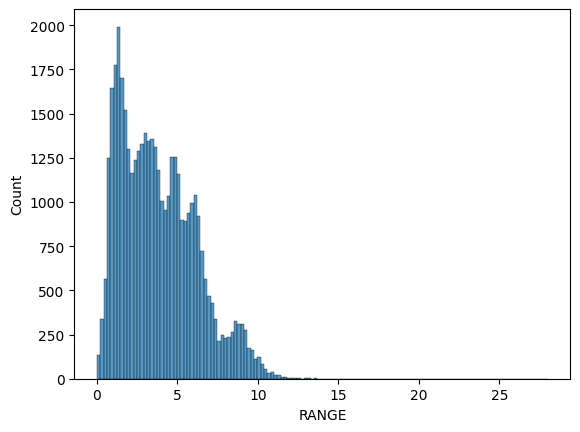

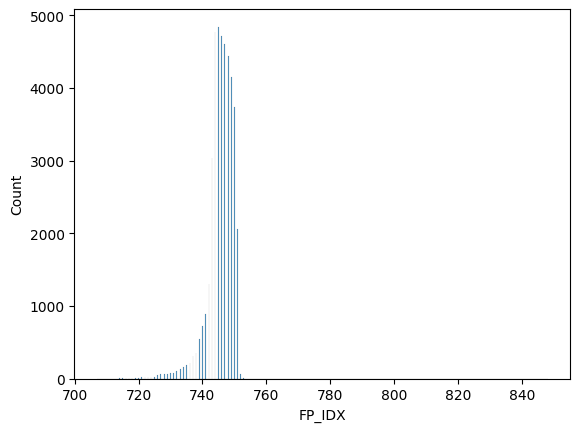

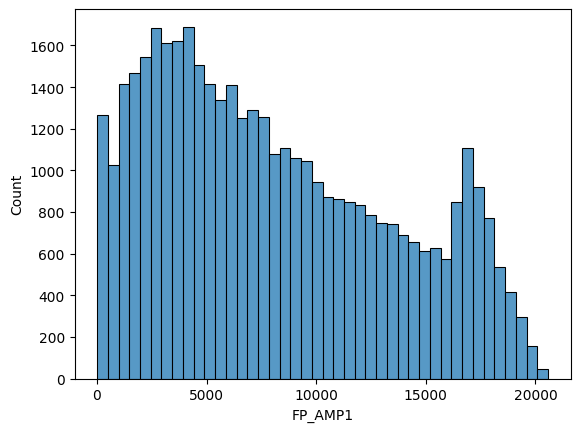

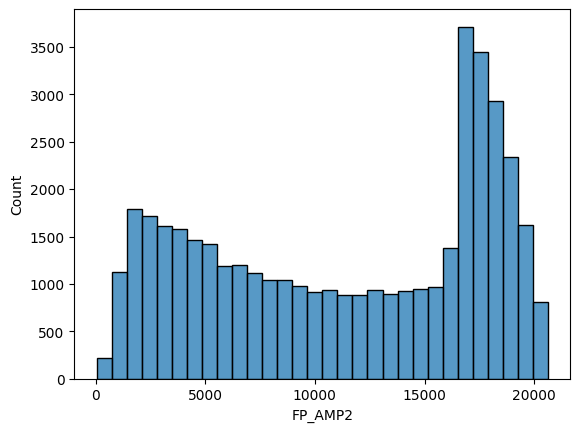

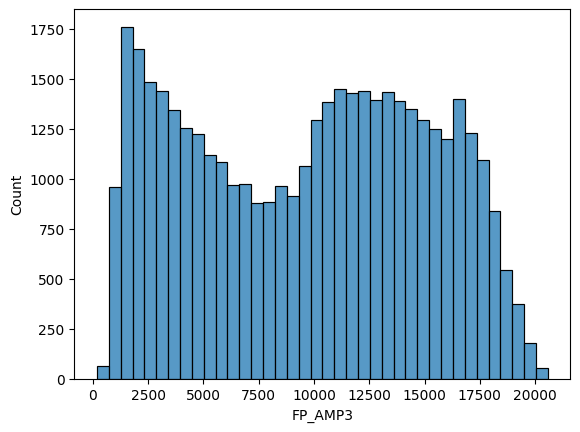

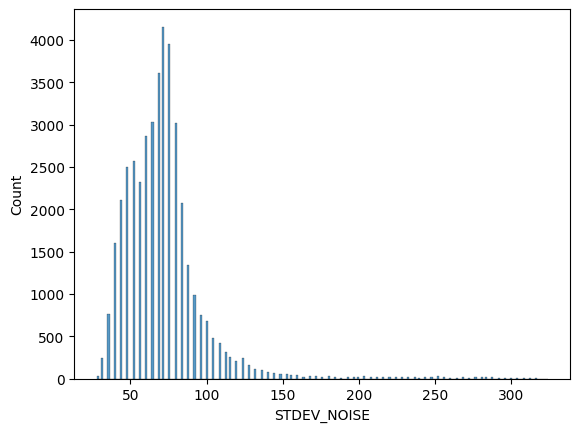

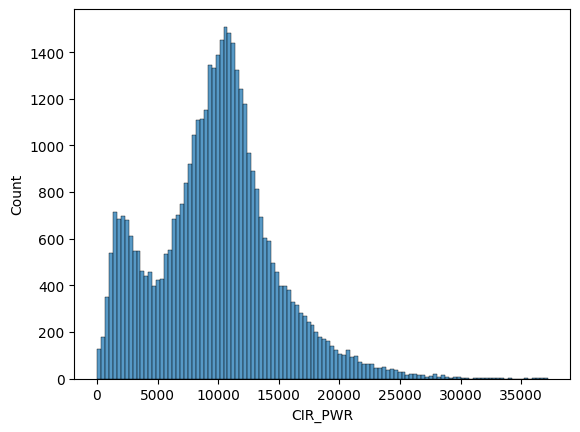

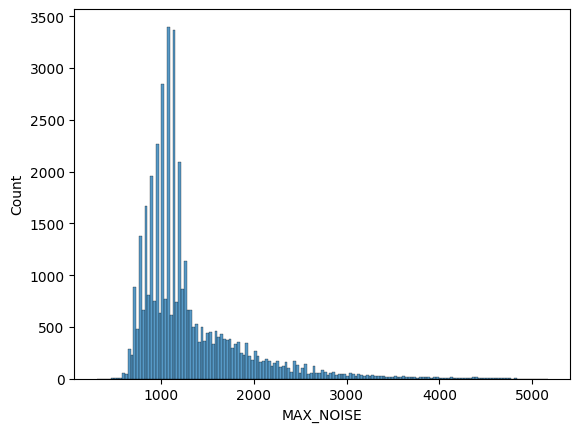

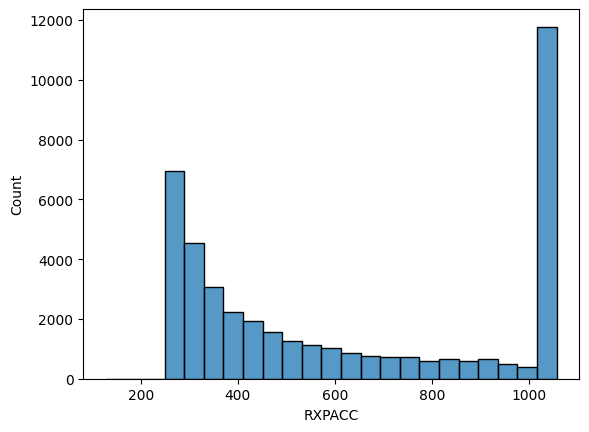

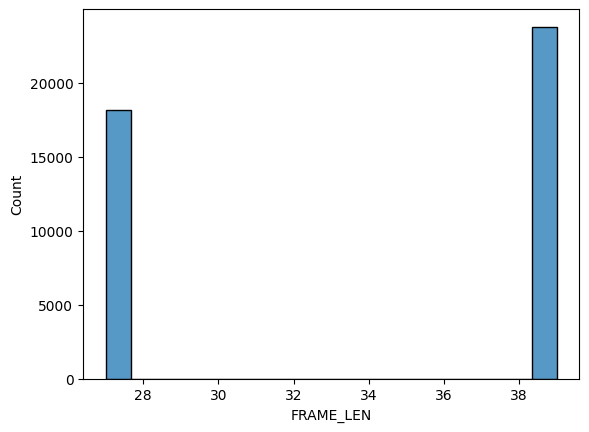

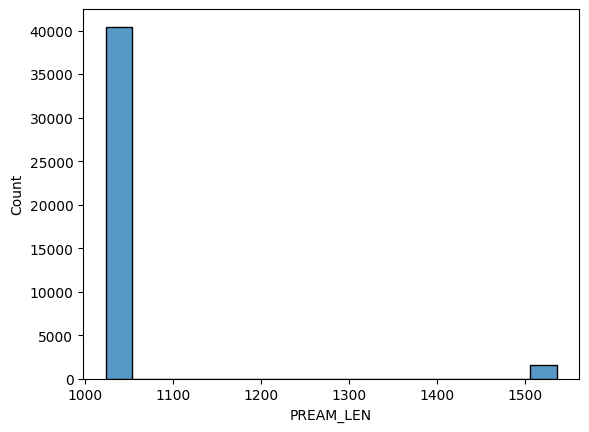

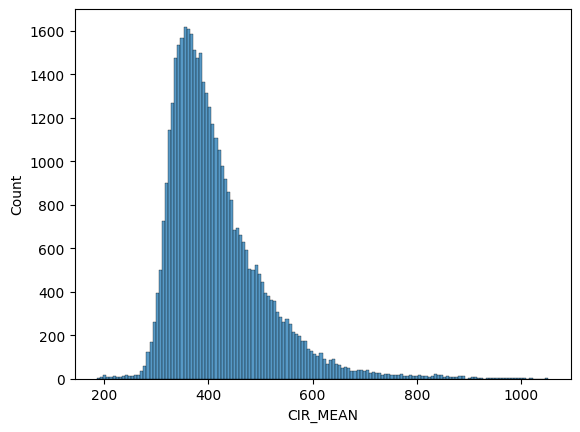


Boxplot of dataset to identify outliers:
-------------------------------


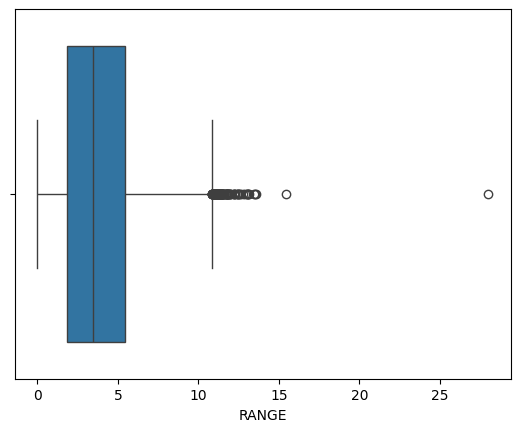

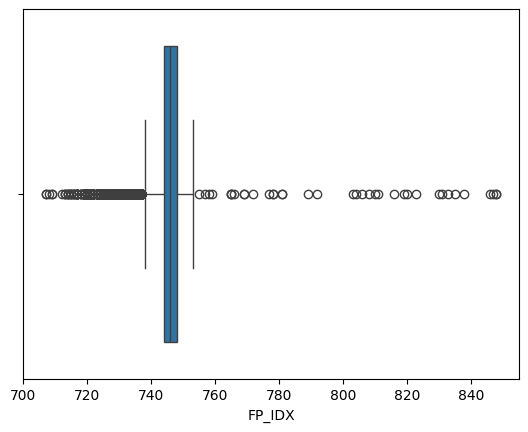

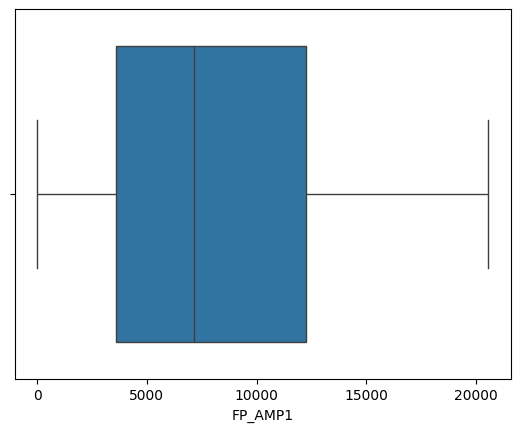

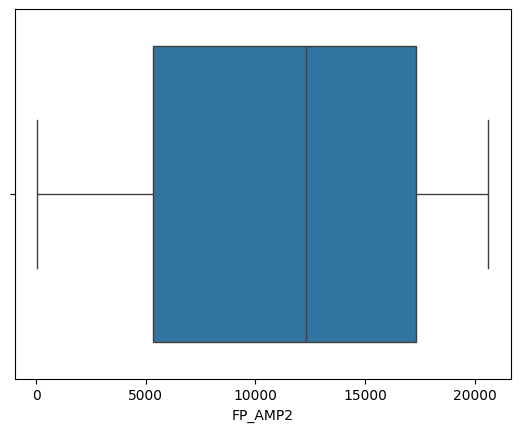

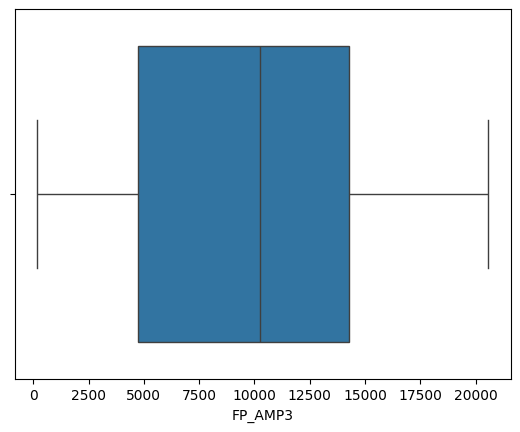

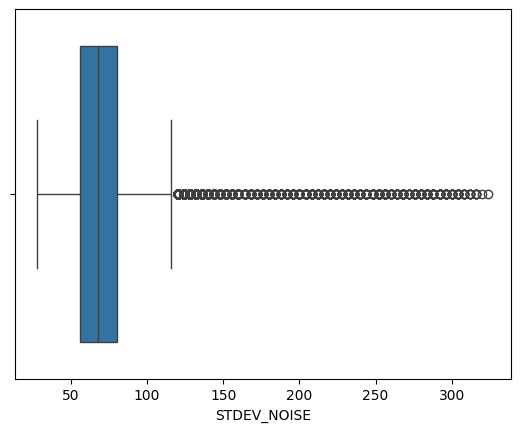

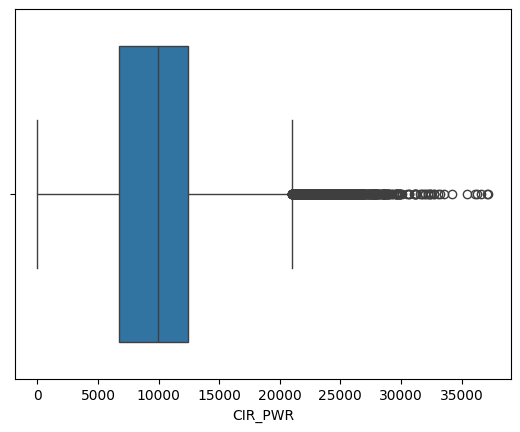

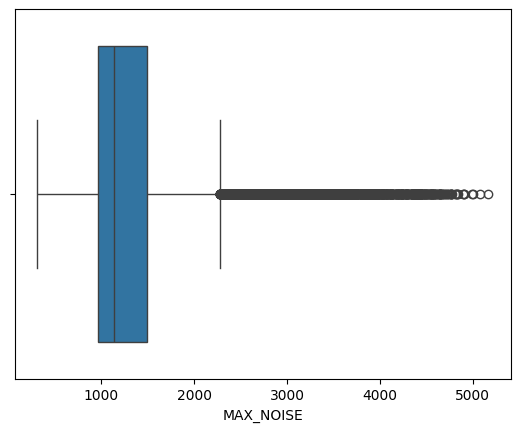

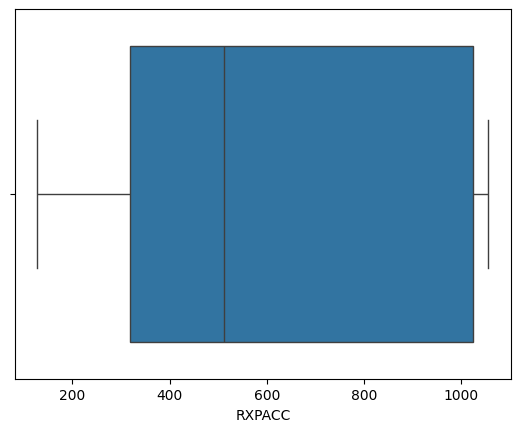

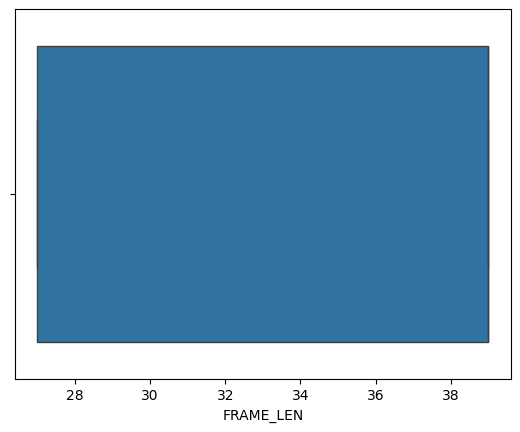

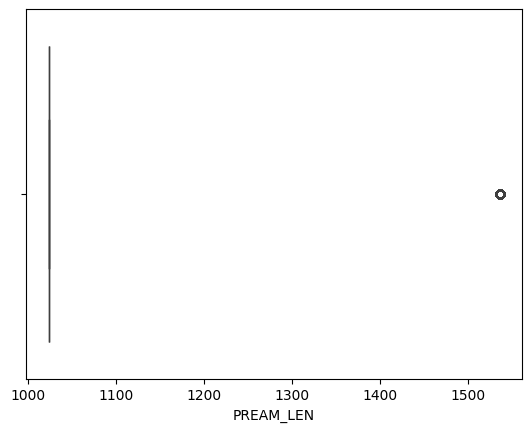

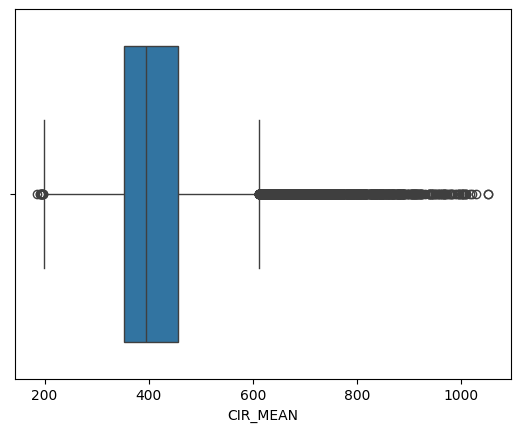


Correlation with heatmap to identify and investigate relationships:
-------------------------------


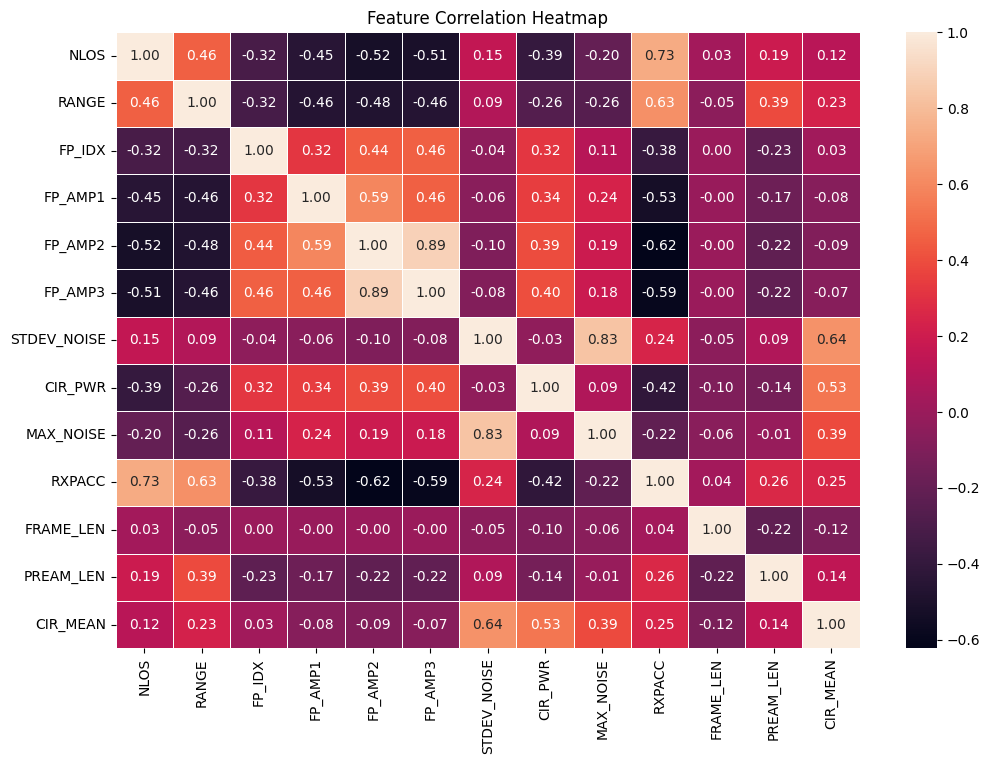

In [9]:
filtered_df = filtered_df.drop(columns=['CH', 'BITRATE', 'PRFR'], errors='ignore')

# Histogram of dataset to understand distribution except for NLOS (Label)
print("\nHistogram of dataset to understand distribution except for NLOS (Label):")
print("-------------------------------")
for i in filtered_df.columns:
    if i != "NLOS":
        sns.histplot(data=filtered_df, x=i)
        plt.show()

# Boxplot of dataset to identify outliers
print("\nBoxplot of dataset to identify outliers:")
print("-------------------------------")
for i in filtered_df.columns:
    if i != "NLOS":
        sns.boxplot(data=filtered_df, x=i)
        plt.show()

# Correlation with heatmap to identify and investigate relationships
print("\nCorrelation with heatmap to identify and investigate relationships:")
print("-------------------------------")
plt.figure(figsize=(12, 8))
plt.title("Feature Correlation Heatmap")
sns.heatmap(filtered_df.corr(), annot=True, fmt='.2f', linewidths=0.5)
plt.show()

### Step 8: Principle Component Analysis (PCA)

We have to first split the Class label from the data before performing PCA

In [ ]:
# Define Data (X) and Class Labels (y)
X = filtered_df.iloc[:, 1:13]  
Y = filtered_df.iloc[:, 0]    

In [32]:
import sklearn
from sklearn.decomposition import PCA

pca = PCA()
pca.fit(X)
projected = pca.transform(X)

columnLabels = []
for i in range (1, X.shape[1]+1):
    columnLabels.append("pc" + str(i))

projected_1 = pd.DataFrame(projected,columns=columnLabels,index=range(1,X.shape[0]+1))

projected_1

,pc1,pc2,pc3,pc4,pc5,pc6,pc7,pc8,pc9,pc10,pc11,pc12
1,5445.108997,4495.126105,-7513.385324,3803.424793,-618.373988,-153.407765,-10.236433,1.046892,11.321145,4.630817,-2.299458,0.690492
2,-1899.589872,11880.298202,-753.262441,-19.677570,-173.085823,176.446429,-12.640521,-62.077004,14.140112,-5.820781,3.097501,-1.919257
3,-7570.064669,7073.485647,2686.311497,-1162.944230,-253.554548,56.167614,-30.288033,13.809528,-3.468321,-6.337712,1.562723,2.898190
4,-4198.626983,1398.252051,-2279.379910,-620.451931,-168.009007,-306.116446,-55.917905,-45.928746,2.887520,3.945139,6.050810,-1.085186
5,10352.466712,1189.920608,-6074.204447,-1261.516173,206.115856,87.711030,9.014177,-26.902099,-2.348148,-6.642172,-1.427385,-0.321073
...,...,...,...,...,...,...,...,...,...,...,...,...
41996,9096.995883,-2140.436782,-1708.492385,318.765892,907.600775,100.598287,4.767765,-1.260641,-9.969941,-6.349717,-2.640100,0.727865
41997,191.159116,-164.086405,6190.289679,-4254.634233,671.128470,349.590047,-0.926104,-22.882339,-5.226244,6.204806,-0.582533,-1.181944
41998,-9137.510618,-4091.389518,-4896.180613,-19.838755,-174.815171,-178.305473,-56.286572,-6.123264,-1.979128,3.143606,4.162196,0.402069
41999,-7841.698397,-4946.571562,-4028.834508,-331.150656,-192.902598,-192.298419,-57.499749,-49.415703,5.373859,-9.041575,1.827022,-1.271351


Explained variances [8.18489996e+07 1.86225561e+07 1.70735522e+07 3.27352639e+06
 3.20228425e+05 5.18321232e+04 8.61901905e+03 1.77749620e+03
 5.13261840e+01 3.27778170e+01 1.49455307e+01 2.60252807e+00]
Sum of explained variances 121201193.05661492
PC count:  12


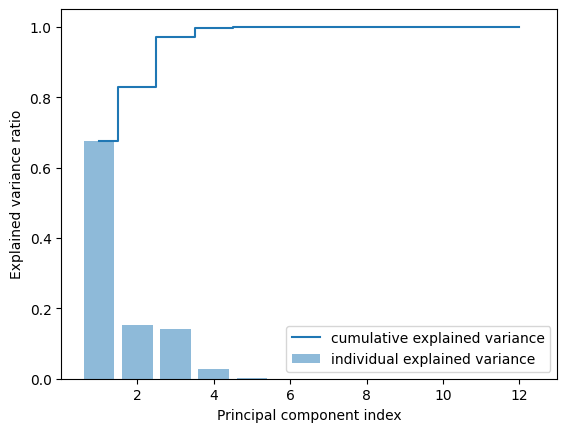

In [34]:
# calculate cumulative sum of explained variances
tot = sum(pca.explained_variance_)
print("Explained variances", pca.explained_variance_)
print("Sum of explained variances", tot)
var_exp = [(i/tot ) for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
pc_count = len(var_exp)
print("PC count: ", pc_count)
# plot explained variances
plt.bar(range(1,pc_count+1), var_exp, alpha=0.5,
        align='center', label='individual explained variance')
plt.step(range(1,pc_count+1), cum_var_exp, where='mid',
         label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.show()

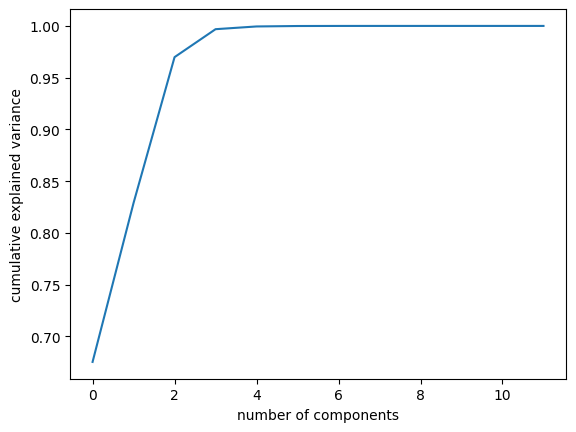

In [36]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');

From the PCA analysis, 3 PC components is sufficient to represent the entire variance of the data. 

### Data Sub-setting/Sampling (Training & Test) 

In [38]:
from sklearn.model_selection import train_test_split

# Create the Training and Test set with split 70:30 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=12)

# Apply PCA
pca = PCA(n_components=3)
pca.fit(X_train)
X_train = pca.transform(X_train)
X_test = pca.transform(X_test)

## <u> Data Mining </u>

## Classification

## Regression

## <u> Data Post-Processing </u>

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=ee77a9d2-e617-4197-bdd4-20a2b8553e12' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>